On Sofie's spleen data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from cycpd import rigid_registration
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
import framework_prototype_v2.generate_ppm as gp
import framework_prototype_v2.generate_weighted_points as gwp
from framework_prototype_v2.label_new_data import label_new_data

In [3]:
df = pd.read_csv("../data/spleen_b_cells_cd4em_mouse1.csv")
df_ref = df[df['batch'] == 'ref']
df_new = df[df['batch'] == 'new_data']

df_ref = df_ref.rename(columns={"cell_type": "Population"})

# Generate PPM

In [4]:
markers = df.columns[0:2]
markers

Index(['CD69#BB700', 'CD19#PE-Cy5'], dtype='object')

In [6]:
ppm_ref_bin_coords, ref_bin_ids = gp.generate_ppm(
    x_vals=df_ref[markers[0]].to_numpy(),
    y_vals=df_ref[markers[1]].to_numpy(),
    grid_size=16
)
df_ref_with_bins = df_ref.copy(deep=True)
df_ref_with_bins.loc[:, 'bin_id'] = ref_bin_ids

ppm_new_dat_bin_coords, new_dat_bin_ids = gp.generate_ppm(
    x_vals=df_new[markers[0]].to_numpy(),
    y_vals=df_new[markers[1]].to_numpy(),
    grid_size=16
)
df_new_with_bins = df_new.copy(deep=True)
df_new_with_bins.loc[:, 'bin_id'] = new_dat_bin_ids


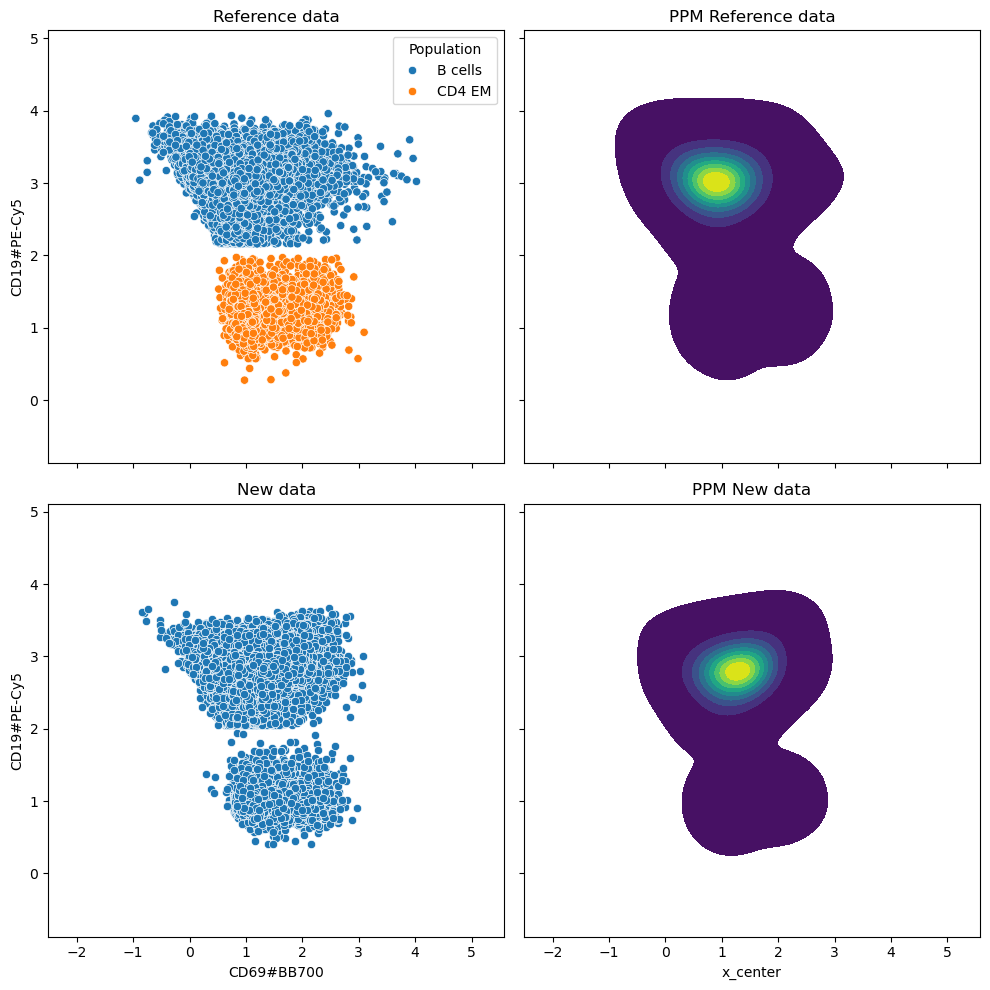

In [7]:
gp.compare_ppms(
    df_ref=df_ref_with_bins,
    df_new=df_new_with_bins,
    ppm_ref_bin_df=ppm_ref_bin_coords,
    ppm_new_bin_df=ppm_new_dat_bin_coords,
    x_axis=markers[0],
    y_axis=markers[1],
    thres=5e-4
)

Why the low CD19 stuff not showing up?

<Axes: xlabel='y_center', ylabel='Density'>

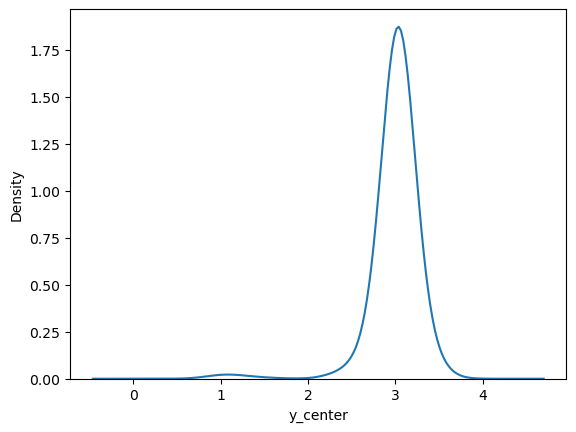

In [12]:
sns.kdeplot(x=ppm_ref_bin_coords["y_center"], weights=ppm_ref_bin_coords["prob"])


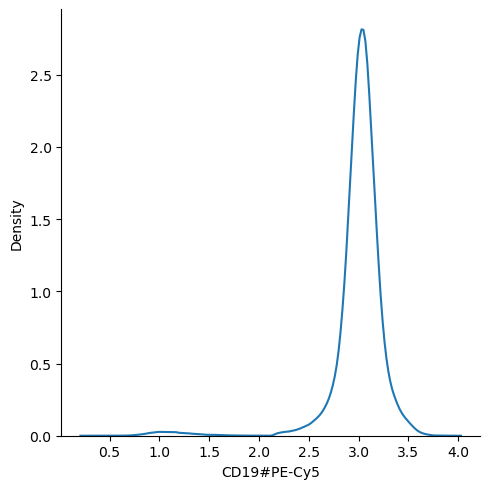

In [14]:
sns.displot(data=df_ref, x=markers[1], kind="kde")

In [6]:
# don't have many CD4EM compared to B cells. Oh boy..
df_ref[df_ref['CD19#PE-Cy5'] < 1.5].shape[0] / df_ref.shape[0]

0.013205151763192624

In [7]:
df_ref[df_ref['CD19#PE-Cy5'] > 2].shape[0] / df_ref.shape[0]

0.9854918731102684

Well the bins are there, but because there are not as many CD4EM compared to B cells, CD4EM is seen as rare cell types.
The kde plot has to still show this..

Have to think of better way of plotting PPM as the bottom stuff are there, but the probabilities are too small to colour..

In [8]:
# use the default parameters
max_points_per_bin=20
# have to lower the probability threshold as otherwise the bottom population get nothing
probability_threshold=1e-5
ref_set_points, _, ref_set_points_bin_ids = gwp.generate_weighted_point_set(
    ppm_bins_df=ppm_ref_bin_coords,
    max_points_per_bin=max_points_per_bin,
    probability_threshold=probability_threshold
)
new_dat_set_points, _, new_dat_set_points_bin_ids = gwp.generate_weighted_point_set(
    ppm_bins_df=ppm_new_dat_bin_coords,
    max_points_per_bin=max_points_per_bin,
    probability_threshold=probability_threshold
)


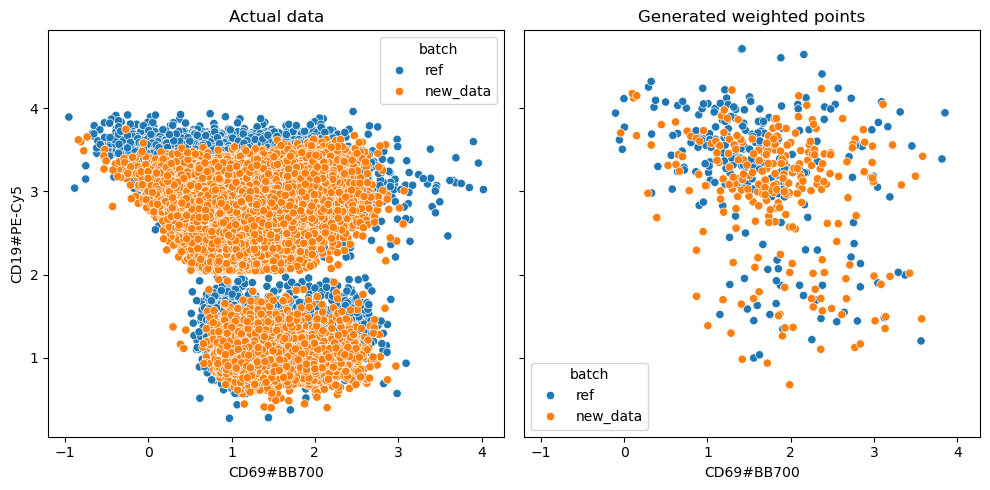

In [9]:
gwp.compare_weighted_points(
    ref_set_points=ref_set_points,
    new_dat_set_points=new_dat_set_points,
    df=df,
    x_axis=markers[0],
    y_axis=markers[1]
)

CPD might have problem here. Let's see.

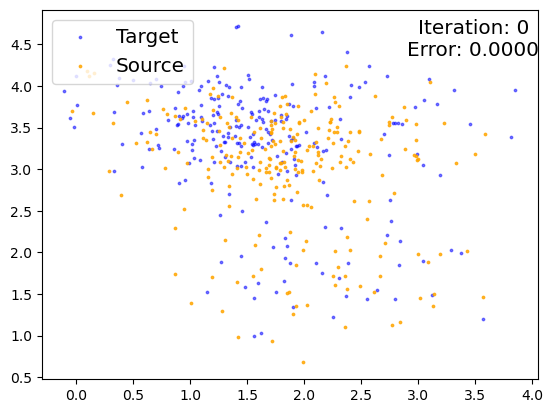

Iteration:1
ML: -1143.741; 	ML change (error):  1143.741; 	Sigma^2:     0.475; 	Sigma^2 change:     0.664
[                                                                        ]


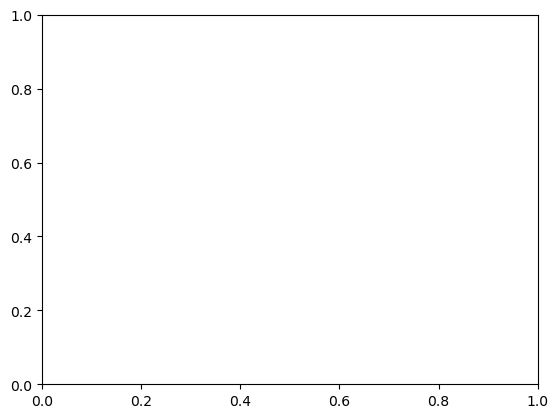

Iteration:2
ML: -1251.643; 	ML change (error):   107.902; 	Sigma^2:     0.421; 	Sigma^2 change:     0.055
[=                                                                       ]


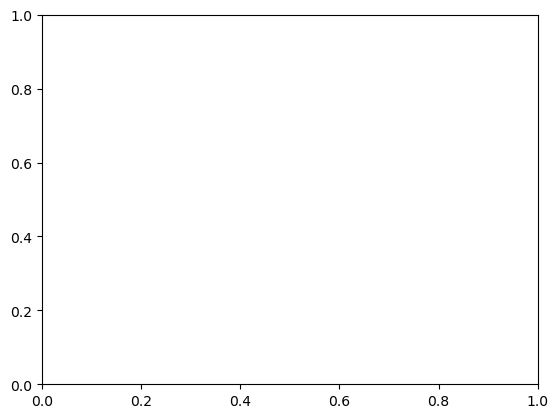

Iteration:3
ML: -1256.925; 	ML change (error):     5.282; 	Sigma^2:     0.382; 	Sigma^2 change:     0.039
[==                                                                      ]


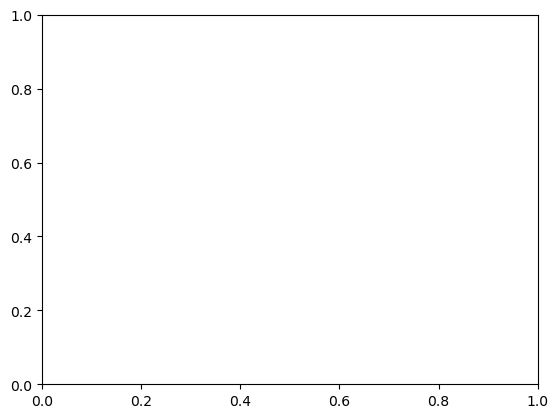

Iteration:4
ML: -1261.471; 	ML change (error):     4.547; 	Sigma^2:     0.342; 	Sigma^2 change:     0.040
[==                                                                      ]


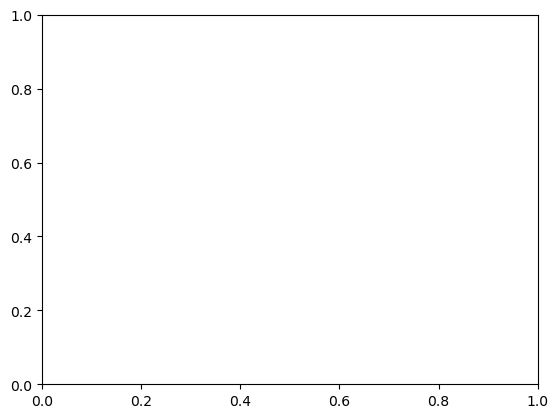

Iteration:5
ML: -1266.688; 	ML change (error):     5.217; 	Sigma^2:     0.303; 	Sigma^2 change:     0.039
[===                                                                     ]


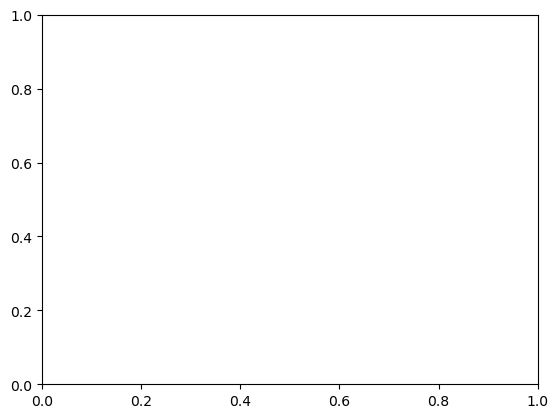

Iteration:6
ML: -1272.366; 	ML change (error):     5.678; 	Sigma^2:     0.266; 	Sigma^2 change:     0.037
[====                                                                    ]


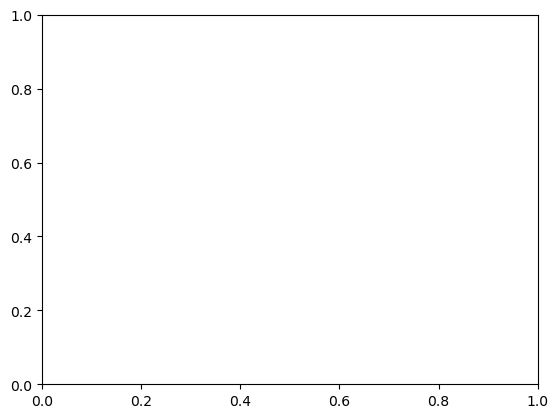

Iteration:7
ML: -1278.125; 	ML change (error):     5.759; 	Sigma^2:     0.233; 	Sigma^2 change:     0.033
[=====                                                                   ]


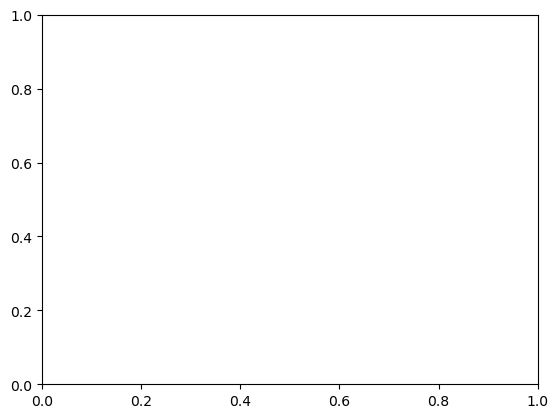

Iteration:8
ML: -1283.586; 	ML change (error):     5.460; 	Sigma^2:     0.205; 	Sigma^2 change:     0.028
[=====                                                                   ]


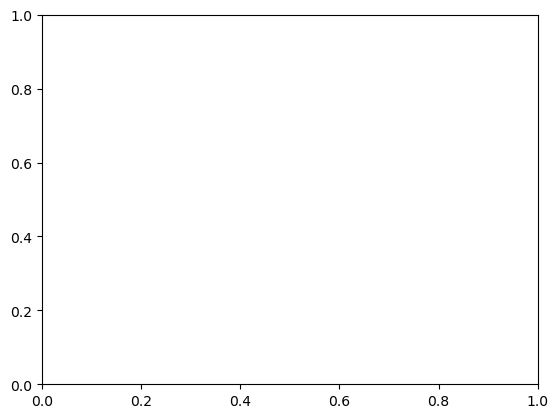

Iteration:9
ML: -1288.469; 	ML change (error):     4.883; 	Sigma^2:     0.181; 	Sigma^2 change:     0.023
[======                                                                  ]


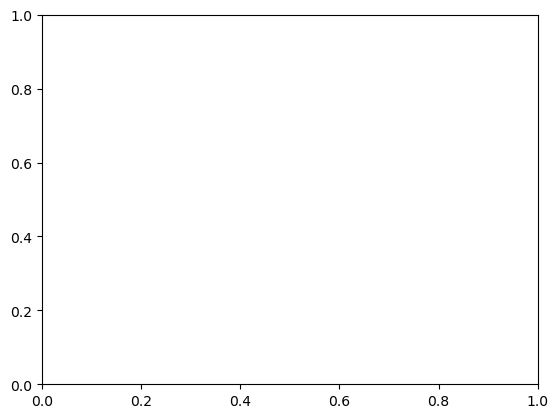

Iteration:10
ML: -1292.636; 	ML change (error):     4.168; 	Sigma^2:     0.162; 	Sigma^2 change:     0.019
[=======                                                                 ]


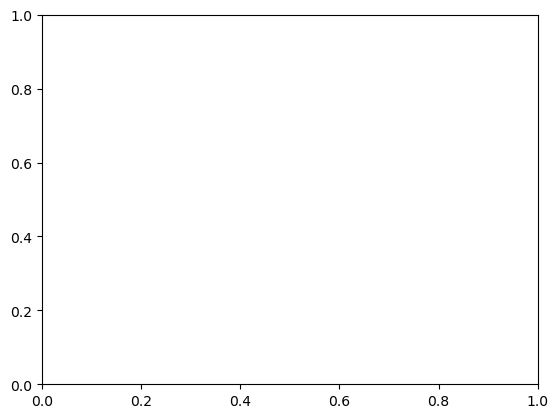

Iteration:11
ML: -1296.073; 	ML change (error):     3.437; 	Sigma^2:     0.146; 	Sigma^2 change:     0.016
[=======                                                                 ]


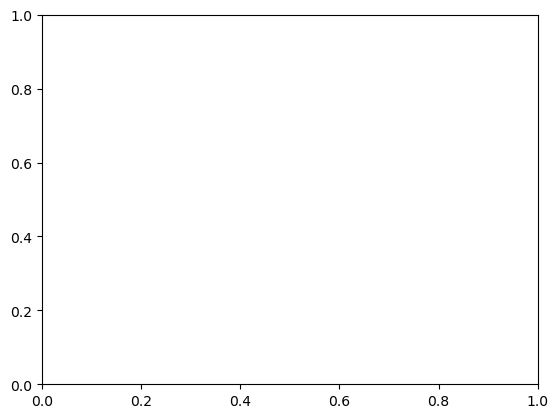

Iteration:12
ML: -1298.841; 	ML change (error):     2.768; 	Sigma^2:     0.134; 	Sigma^2 change:     0.013
[========                                                                ]


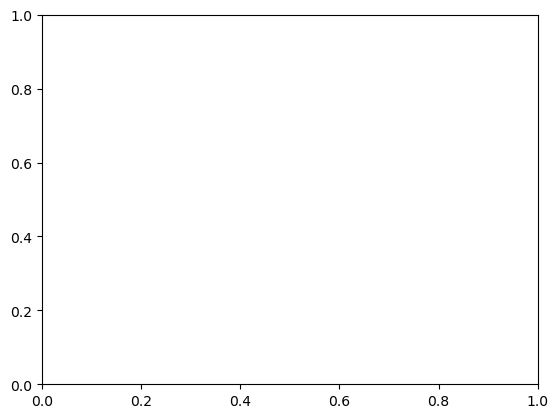

Iteration:13
ML: -1301.035; 	ML change (error):     2.194; 	Sigma^2:     0.123; 	Sigma^2 change:     0.010
[=========                                                               ]


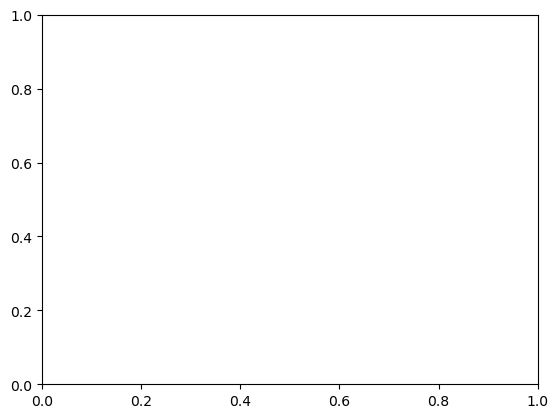

Iteration:14
ML: -1302.757; 	ML change (error):     1.723; 	Sigma^2:     0.115; 	Sigma^2 change:     0.009
[==========                                                              ]


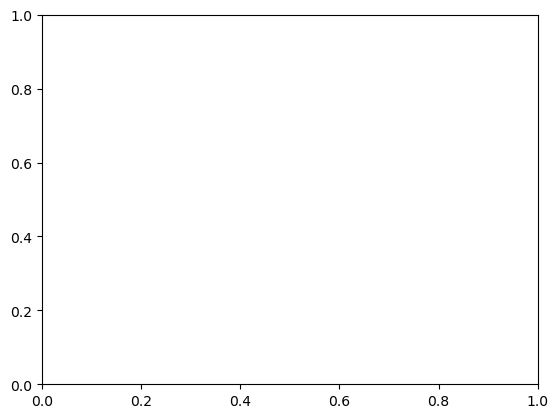

Iteration:15
ML: -1304.103; 	ML change (error):     1.345; 	Sigma^2:     0.108; 	Sigma^2 change:     0.007
[==========                                                              ]


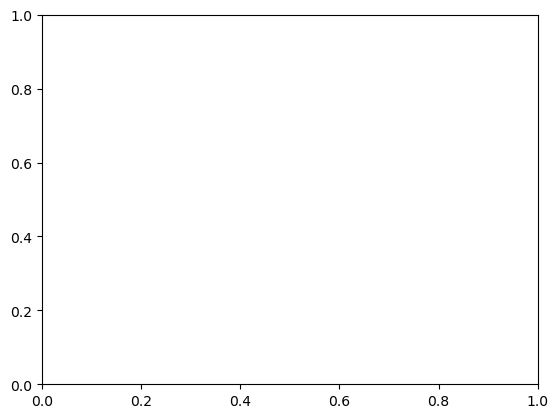

Iteration:16
ML: -1305.152; 	ML change (error):     1.049; 	Sigma^2:     0.102; 	Sigma^2 change:     0.006
[===========                                                             ]


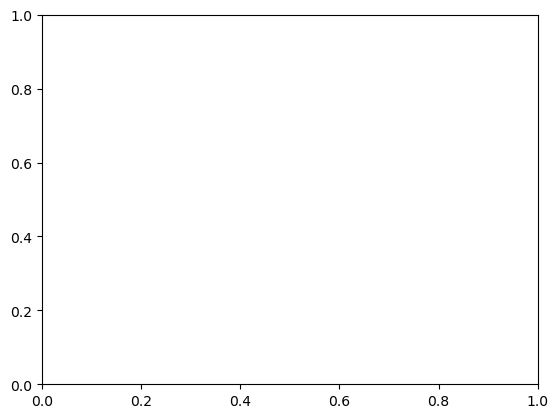

Iteration:17
ML: -1305.970; 	ML change (error):     0.818; 	Sigma^2:     0.097; 	Sigma^2 change:     0.005
[============                                                            ]


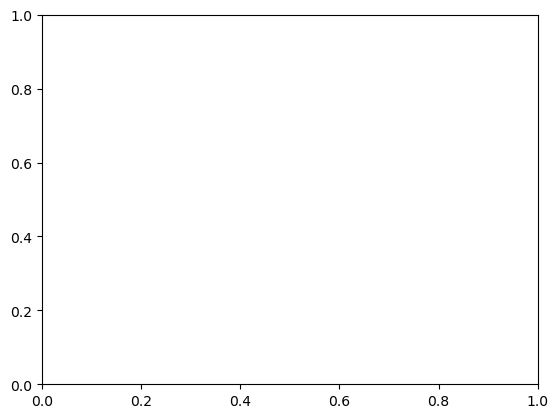

Iteration:18
ML: -1306.610; 	ML change (error):     0.640; 	Sigma^2:     0.093; 	Sigma^2 change:     0.004
[============                                                            ]


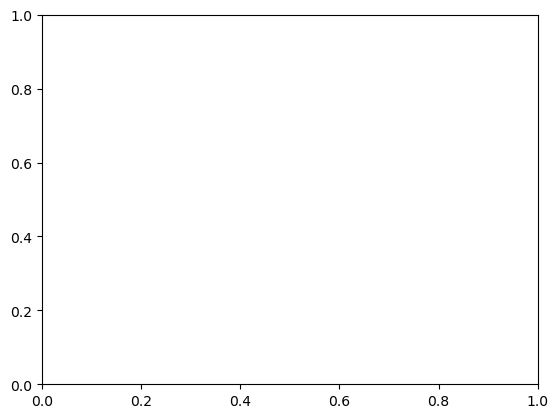

Iteration:19
ML: -1307.112; 	ML change (error):     0.502; 	Sigma^2:     0.089; 	Sigma^2 change:     0.003
[=============                                                           ]


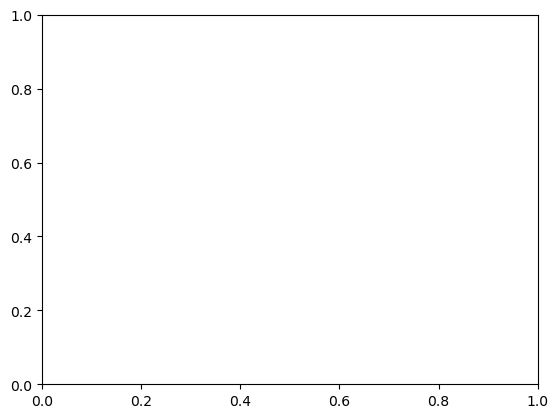

Iteration:20
ML: -1307.509; 	ML change (error):     0.397; 	Sigma^2:     0.086; 	Sigma^2 change:     0.003
[==============                                                          ]


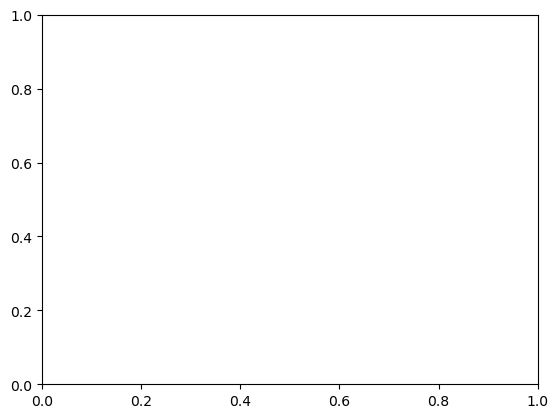

Iteration:21
ML: -1307.824; 	ML change (error):     0.315; 	Sigma^2:     0.084; 	Sigma^2 change:     0.003
[===============                                                         ]


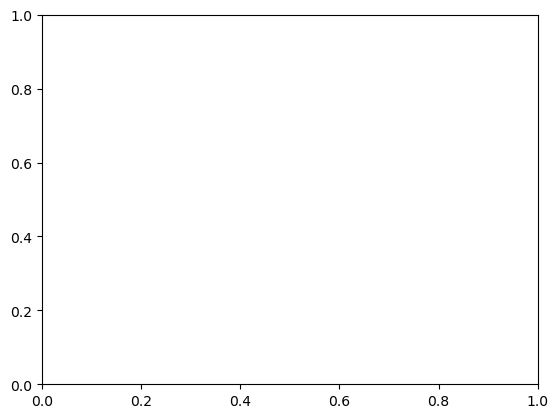

Iteration:22
ML: -1308.076; 	ML change (error):     0.252; 	Sigma^2:     0.082; 	Sigma^2 change:     0.002
[===============                                                         ]


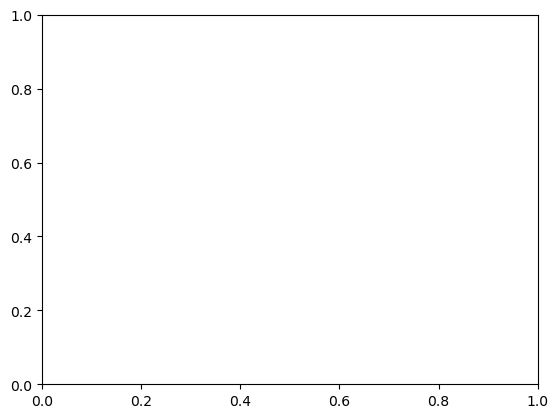

Iteration:23
ML: -1308.279; 	ML change (error):     0.203; 	Sigma^2:     0.080; 	Sigma^2 change:     0.002
[================                                                        ]


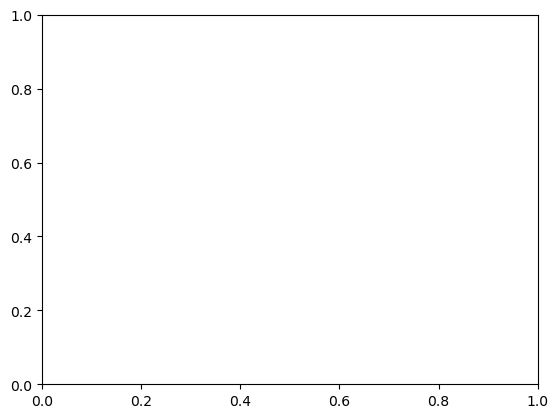

Iteration:24
ML: -1308.444; 	ML change (error):     0.165; 	Sigma^2:     0.078; 	Sigma^2 change:     0.002
[=================                                                       ]


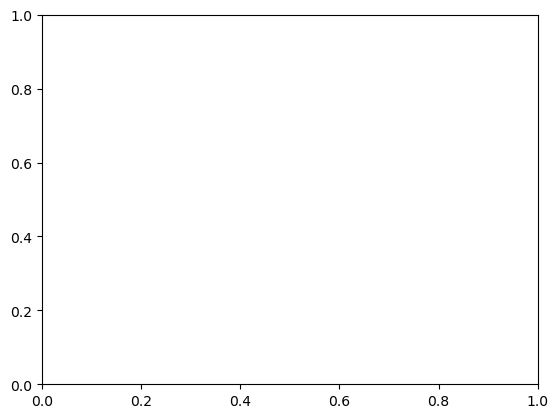

Iteration:25
ML: -1308.579; 	ML change (error):     0.135; 	Sigma^2:     0.077; 	Sigma^2 change:     0.001
[==================                                                      ]


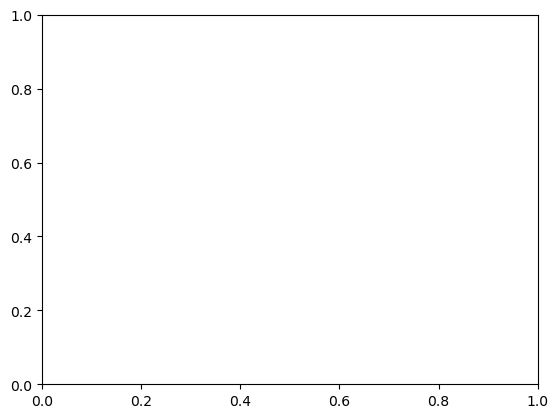

Iteration:26
ML: -1308.691; 	ML change (error):     0.112; 	Sigma^2:     0.075; 	Sigma^2 change:     0.001
[==================                                                      ]


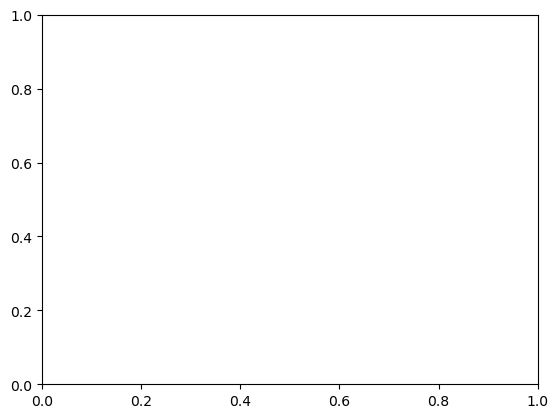

Iteration:27
ML: -1308.784; 	ML change (error):     0.093; 	Sigma^2:     0.074; 	Sigma^2 change:     0.001
[===================                                                     ]


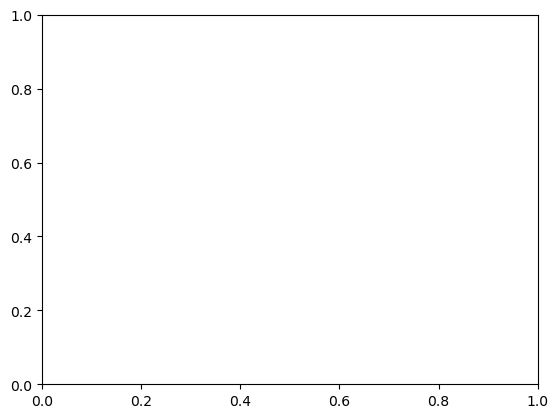

Iteration:28
ML: -1308.861; 	ML change (error):     0.078; 	Sigma^2:     0.073; 	Sigma^2 change:     0.001
[====================                                                    ]


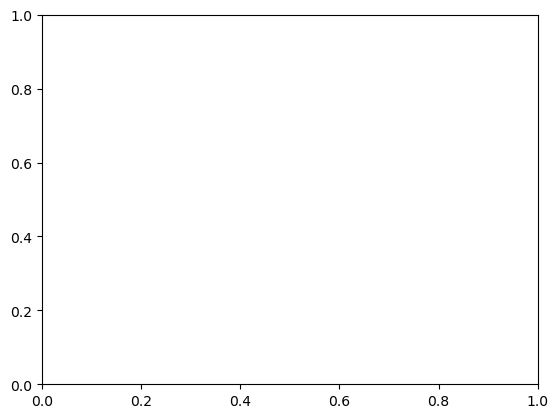

Iteration:29
ML: -1308.927; 	ML change (error):     0.065; 	Sigma^2:     0.072; 	Sigma^2 change:     0.001
[====================                                                    ]


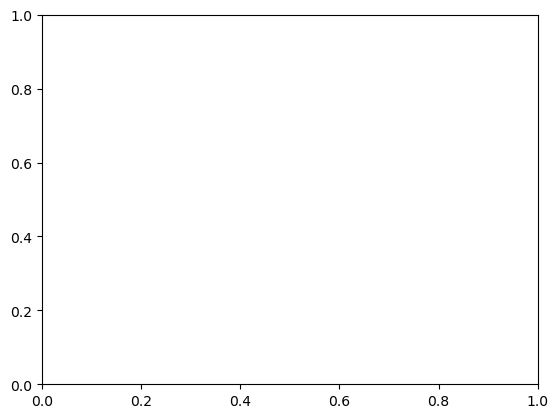

Iteration:30
ML: -1308.982; 	ML change (error):     0.055; 	Sigma^2:     0.071; 	Sigma^2 change:     0.001
[=====================                                                   ]


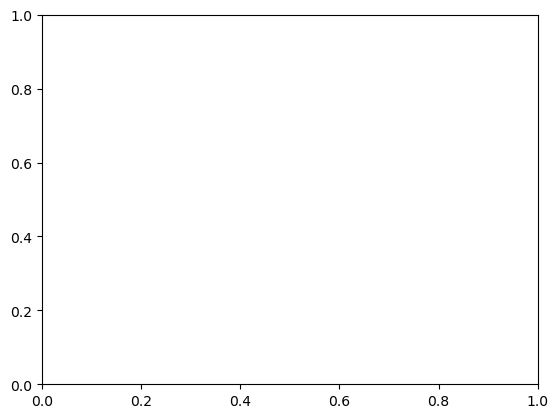

Iteration:31
ML: -1309.030; 	ML change (error):     0.047; 	Sigma^2:     0.071; 	Sigma^2 change:     0.001
[======================                                                  ]


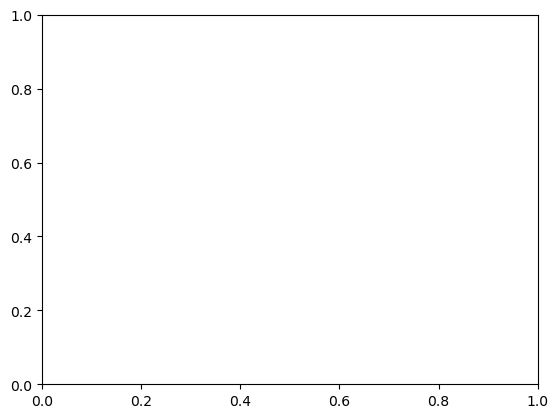

Iteration:32
ML: -1309.070; 	ML change (error):     0.040; 	Sigma^2:     0.070; 	Sigma^2 change:     0.001
[=======================                                                 ]


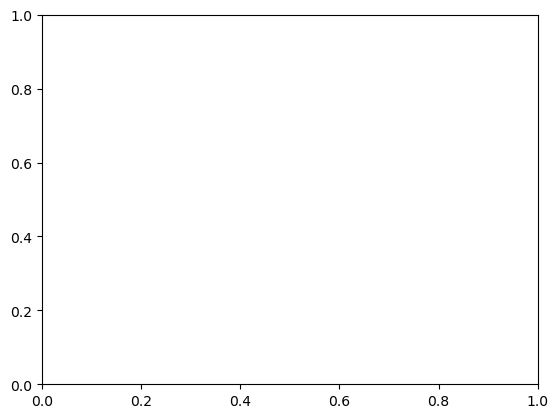

Iteration:33
ML: -1309.105; 	ML change (error):     0.035; 	Sigma^2:     0.069; 	Sigma^2 change:     0.001
[=======================                                                 ]


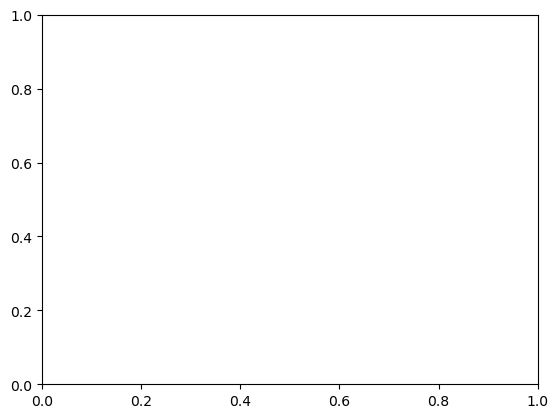

Iteration:34
ML: -1309.135; 	ML change (error):     0.030; 	Sigma^2:     0.069; 	Sigma^2 change:     0.001
[========================                                                ]


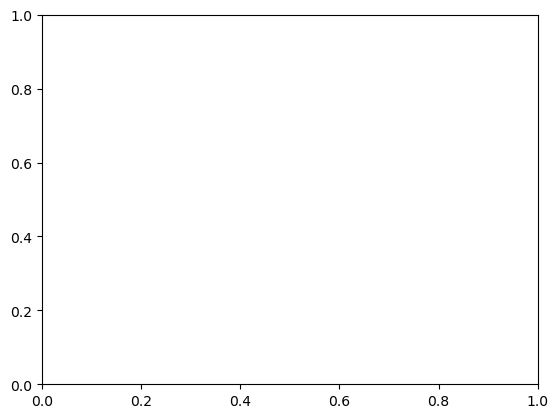

Iteration:35
ML: -1309.161; 	ML change (error):     0.026; 	Sigma^2:     0.068; 	Sigma^2 change:     0.001
[=========================                                               ]


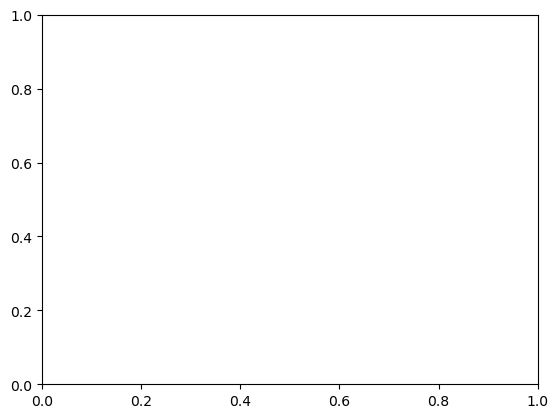

Iteration:36
ML: -1309.183; 	ML change (error):     0.023; 	Sigma^2:     0.068; 	Sigma^2 change:     0.000
[=========================                                               ]


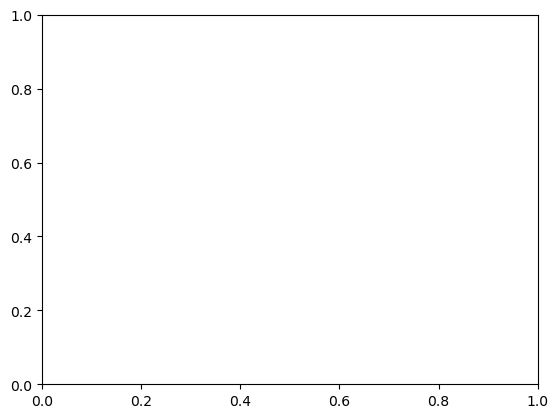

Iteration:37
ML: -1309.203; 	ML change (error):     0.020; 	Sigma^2:     0.067; 	Sigma^2 change:     0.000
[==========================                                              ]


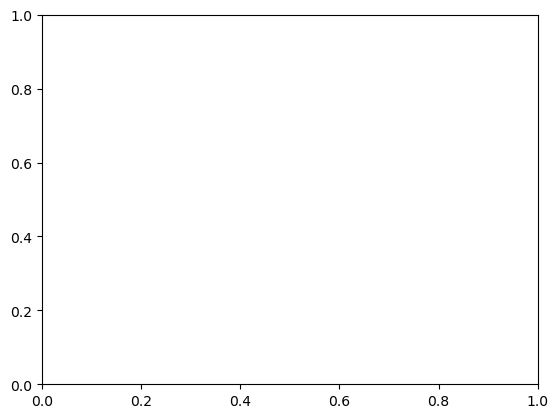

Iteration:38
ML: -1309.220; 	ML change (error):     0.017; 	Sigma^2:     0.067; 	Sigma^2 change:     0.000
[===========================                                             ]


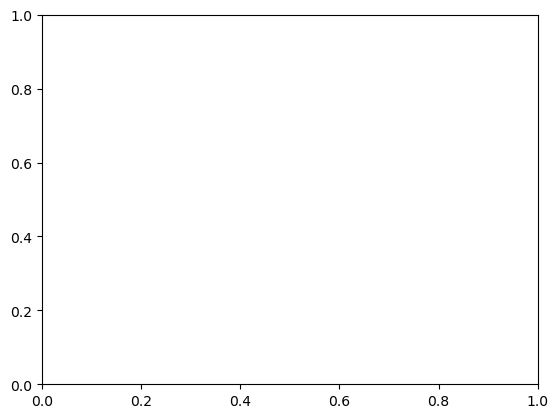

Iteration:39
ML: -1309.235; 	ML change (error):     0.015; 	Sigma^2:     0.066; 	Sigma^2 change:     0.000
[============================                                            ]


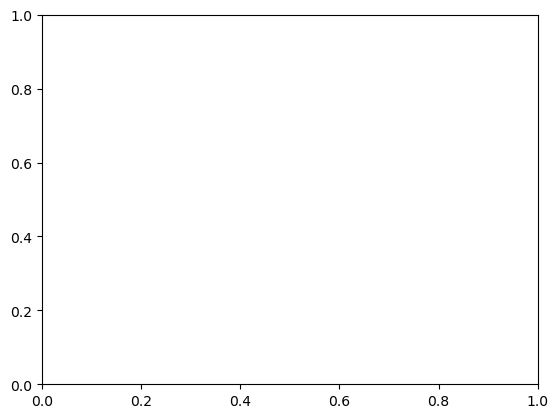

Iteration:40
ML: -1309.248; 	ML change (error):     0.013; 	Sigma^2:     0.066; 	Sigma^2 change:     0.000
[============================                                            ]


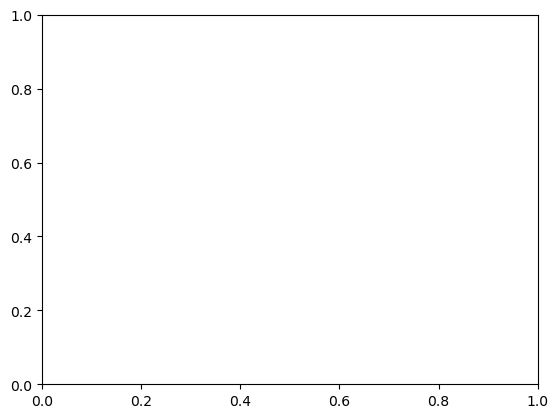

Iteration:41
ML: -1309.259; 	ML change (error):     0.011; 	Sigma^2:     0.066; 	Sigma^2 change:     0.000
[=============================                                           ]


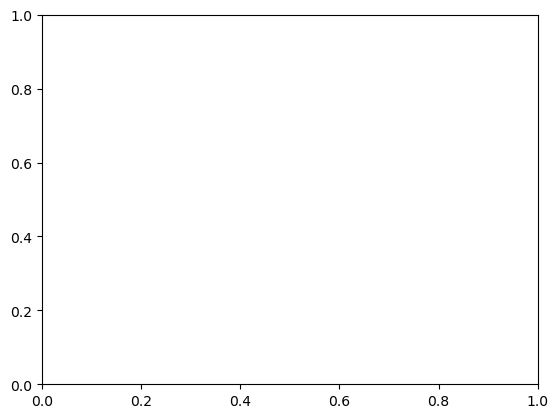

Iteration:42
ML: -1309.269; 	ML change (error):     0.010; 	Sigma^2:     0.065; 	Sigma^2 change:     0.000
[==============================                                          ]


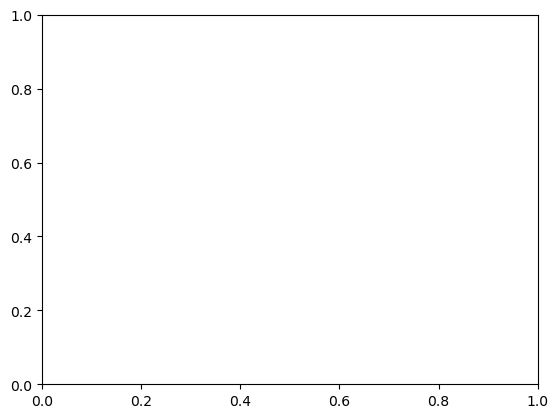

Iteration:43
ML: -1309.278; 	ML change (error):     0.009; 	Sigma^2:     0.065; 	Sigma^2 change:     0.000
[==============================                                          ]


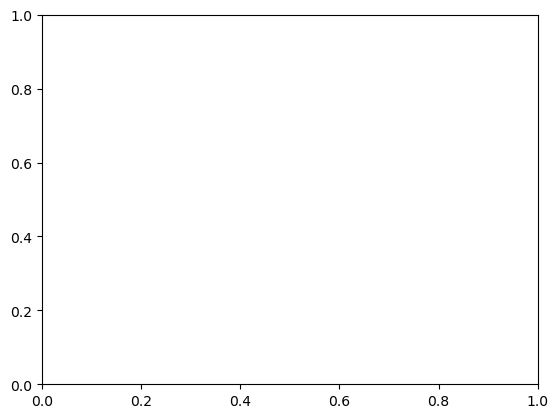

Iteration:44
ML: -1309.286; 	ML change (error):     0.008; 	Sigma^2:     0.065; 	Sigma^2 change:     0.000
[===============================                                         ]


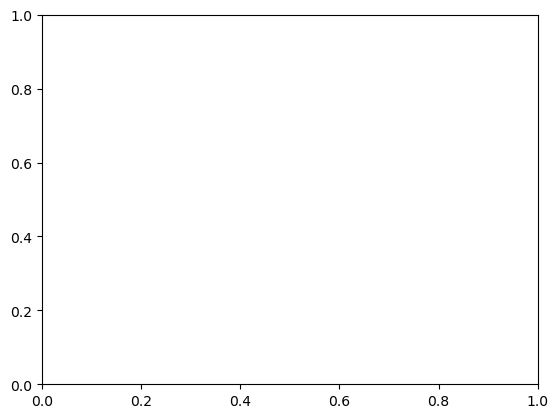

Iteration:45
ML: -1309.293; 	ML change (error):     0.007; 	Sigma^2:     0.065; 	Sigma^2 change:     0.000
[================================                                        ]


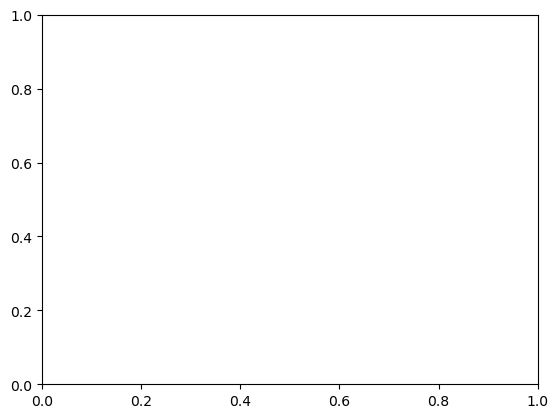

Iteration:46
ML: -1309.299; 	ML change (error):     0.006; 	Sigma^2:     0.064; 	Sigma^2 change:     0.000
[=================================                                       ]


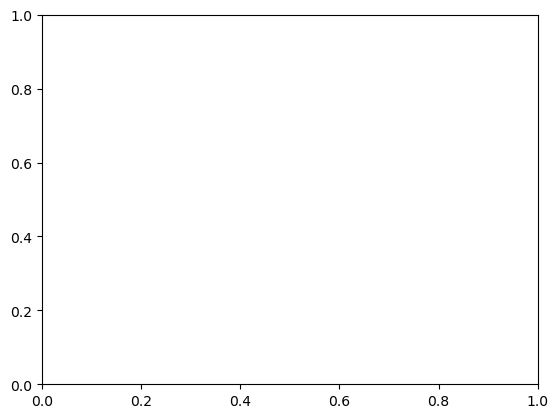

Iteration:47
ML: -1309.304; 	ML change (error):     0.005; 	Sigma^2:     0.064; 	Sigma^2 change:     0.000
[=================================                                       ]


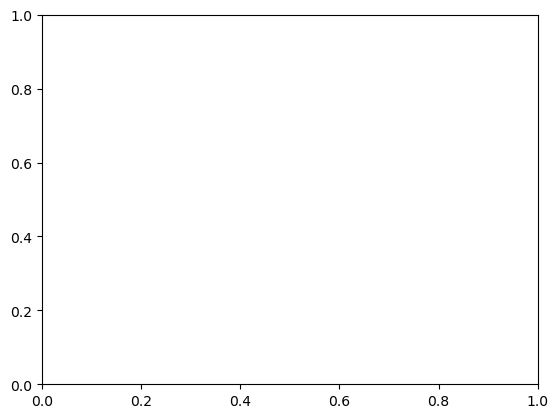

Iteration:48
ML: -1309.309; 	ML change (error):     0.005; 	Sigma^2:     0.064; 	Sigma^2 change:     0.000
[==================================                                      ]


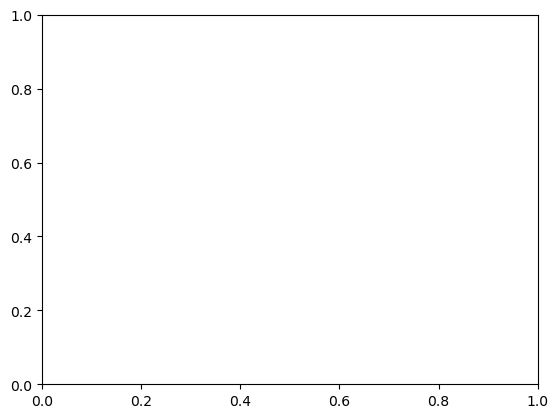

Iteration:49
ML: -1309.313; 	ML change (error):     0.004; 	Sigma^2:     0.064; 	Sigma^2 change:     0.000
[===================================                                     ]


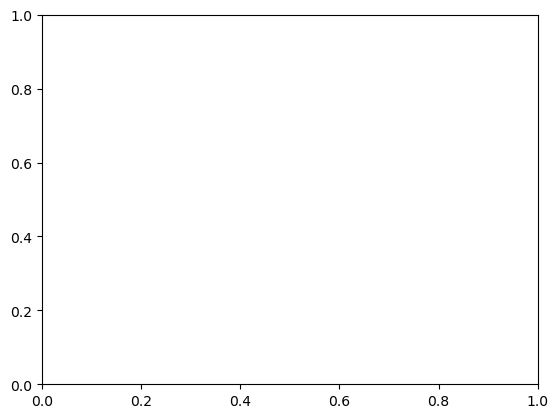

Iteration:50
ML: -1309.317; 	ML change (error):     0.004; 	Sigma^2:     0.064; 	Sigma^2 change:     0.000
[====================================                                    ]


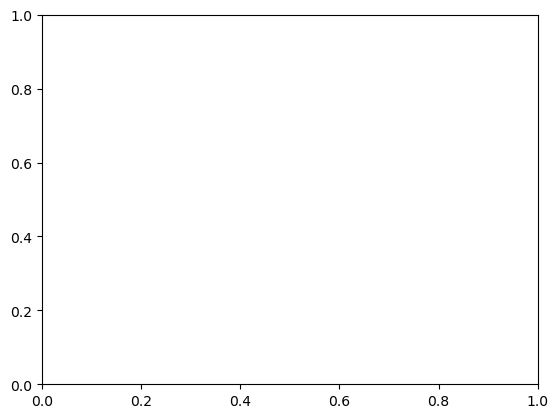

Iteration:51
ML: -1309.320; 	ML change (error):     0.003; 	Sigma^2:     0.063; 	Sigma^2 change:     0.000
[====================================                                    ]


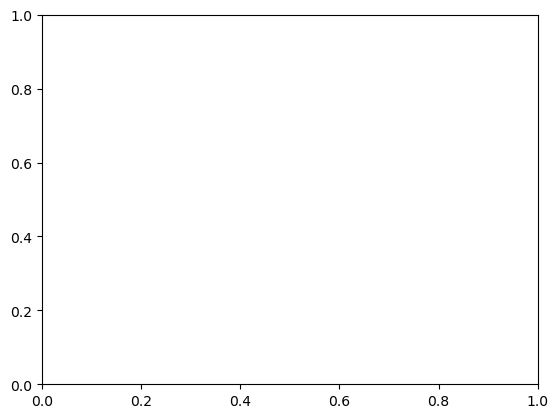

Iteration:52
ML: -1309.323; 	ML change (error):     0.003; 	Sigma^2:     0.063; 	Sigma^2 change:     0.000
[=====================================                                   ]


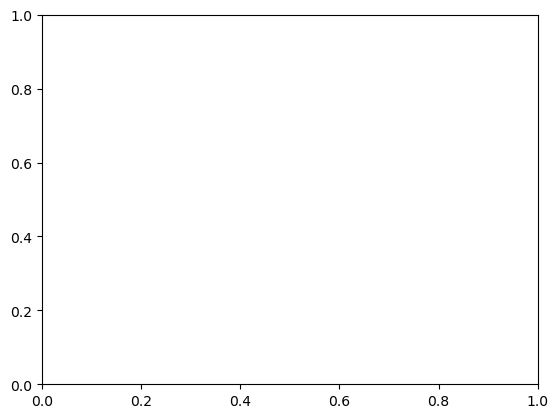

Iteration:53
ML: -1309.325; 	ML change (error):     0.003; 	Sigma^2:     0.063; 	Sigma^2 change:     0.000
[======================================                                  ]


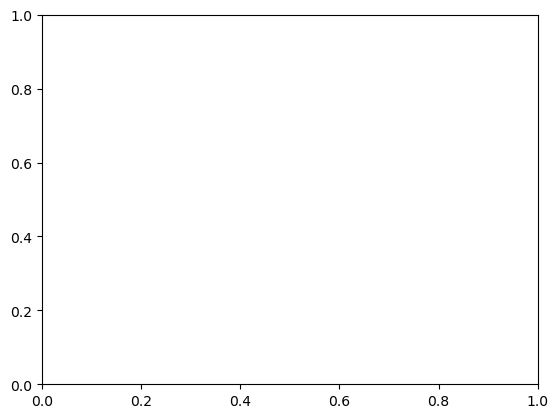

Iteration:54
ML: -1309.328; 	ML change (error):     0.002; 	Sigma^2:     0.063; 	Sigma^2 change:     0.000
[======================================                                  ]


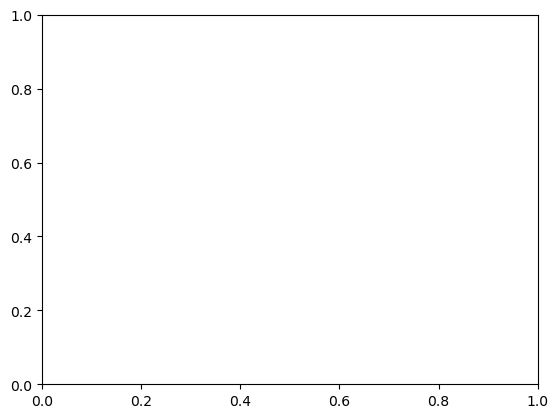

Iteration:55
ML: -1309.330; 	ML change (error):     0.002; 	Sigma^2:     0.063; 	Sigma^2 change:     0.000
[=======================================                                 ]


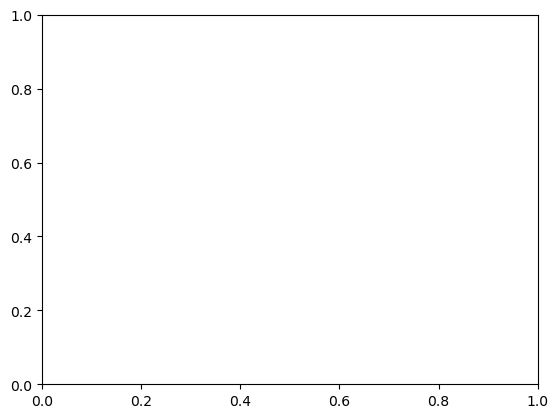

Iteration:56
ML: -1309.331; 	ML change (error):     0.002; 	Sigma^2:     0.063; 	Sigma^2 change:     0.000
[========================================                                ]


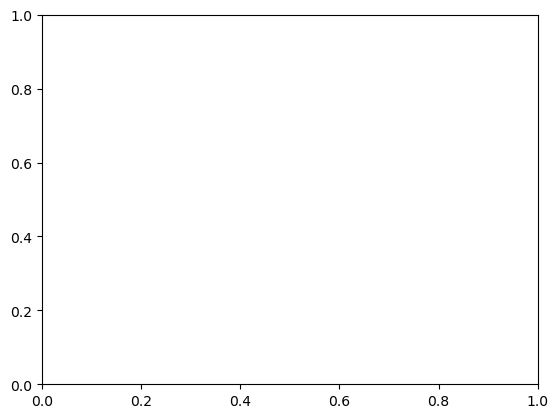

Iteration:57
ML: -1309.333; 	ML change (error):     0.002; 	Sigma^2:     0.063; 	Sigma^2 change:     0.000
[=========================================                               ]


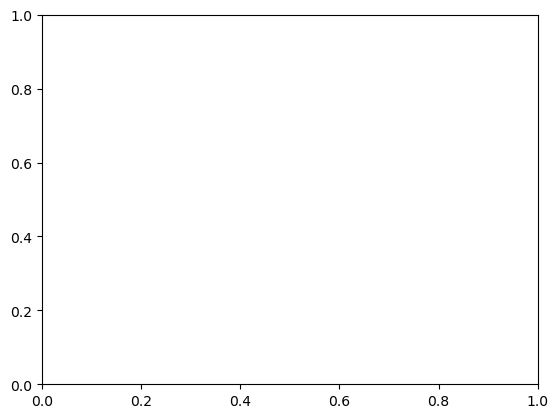

Iteration:58
ML: -1309.334; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[=========================================                               ]


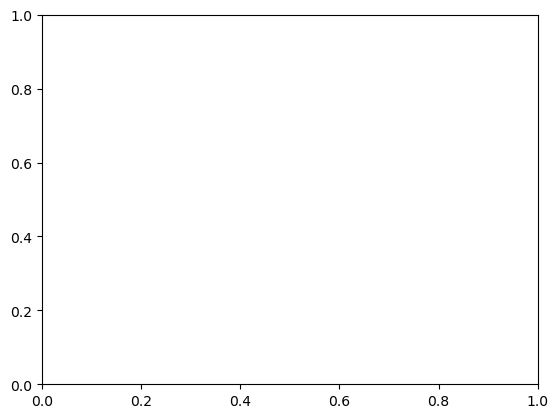

Iteration:59
ML: -1309.336; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[==========================================                              ]


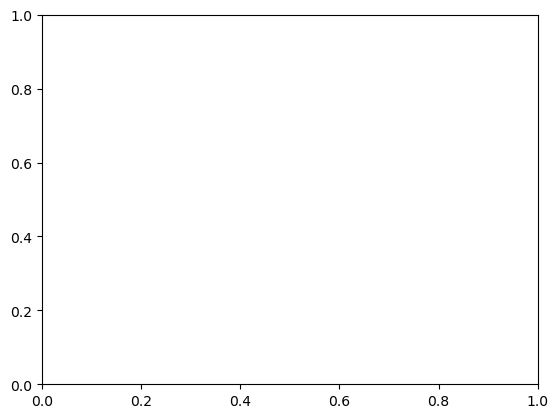

Iteration:60
ML: -1309.337; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[===========================================                             ]


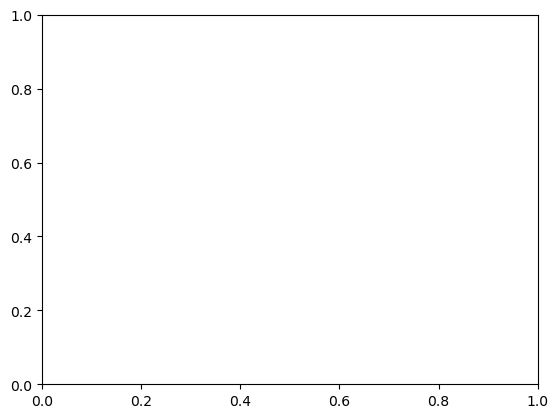

Iteration:61
ML: -1309.338; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[===========================================                             ]


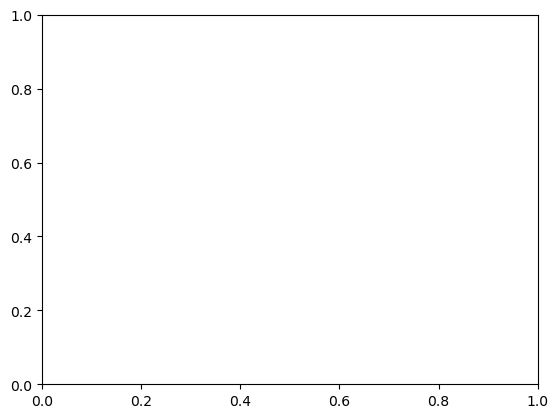

Iteration:62
ML: -1309.338; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[============================================                            ]


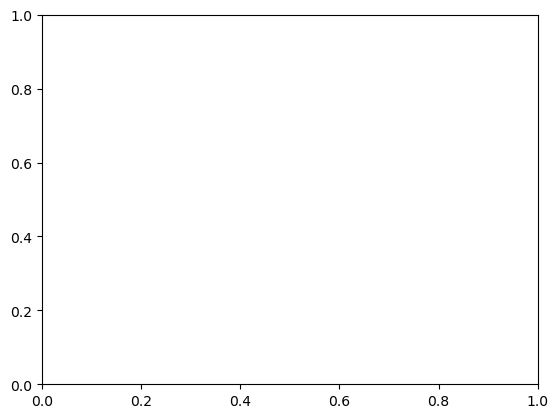

Iteration:63
ML: -1309.339; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[=============================================                           ]


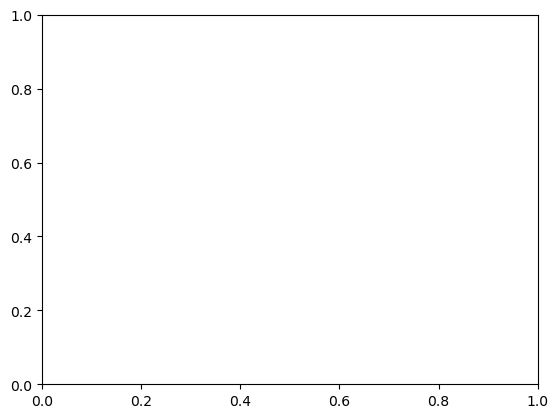

Iteration:64
ML: -1309.340; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[==============================================                          ]


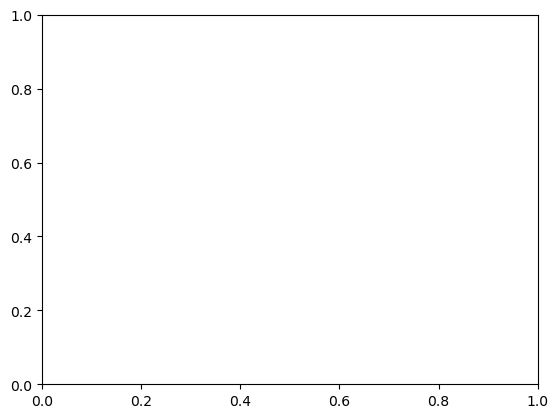

Iteration:65
ML: -1309.341; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[==============================================                          ]


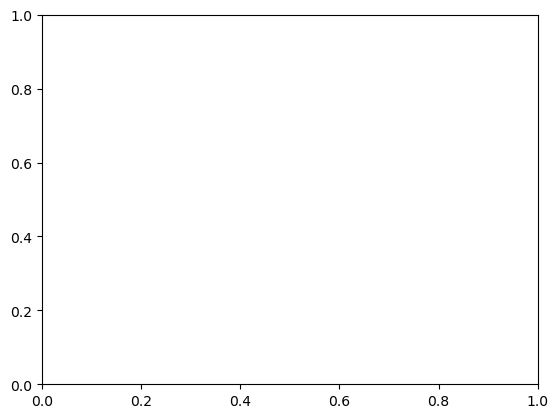

Iteration:66
ML: -1309.341; 	ML change (error):     0.001; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[===============================================                         ]


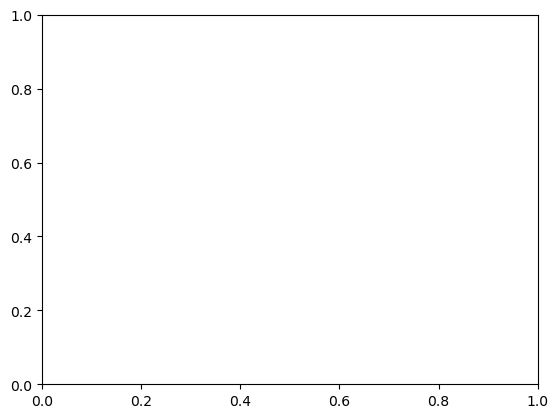

Iteration:67
ML: -1309.342; 	ML change (error):     0.000; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[================================================                        ]


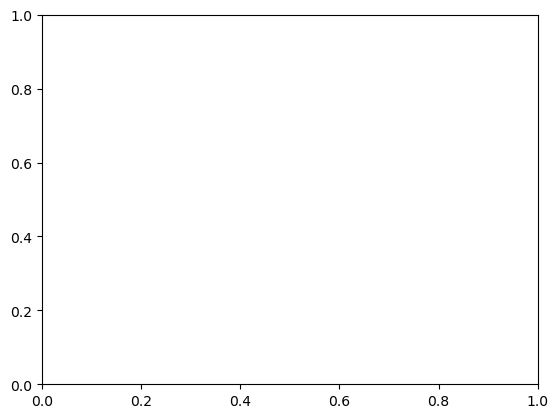

Iteration:68
ML: -1309.342; 	ML change (error):     0.000; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[================================================                        ]


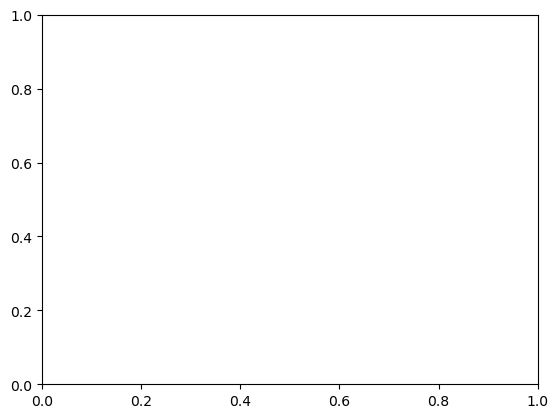

Iteration:69
ML: -1309.342; 	ML change (error):     0.000; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[=================================================                       ]


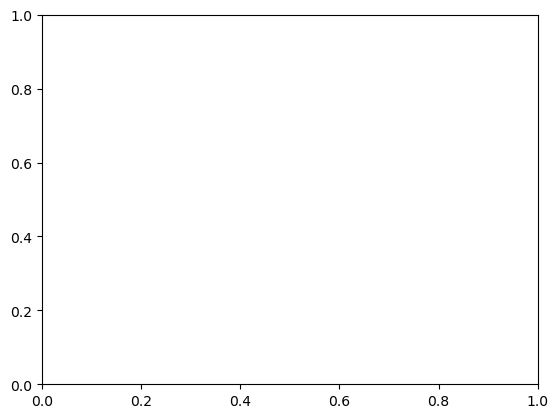

Iteration:70
ML: -1309.343; 	ML change (error):     0.000; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[==================================================                      ]


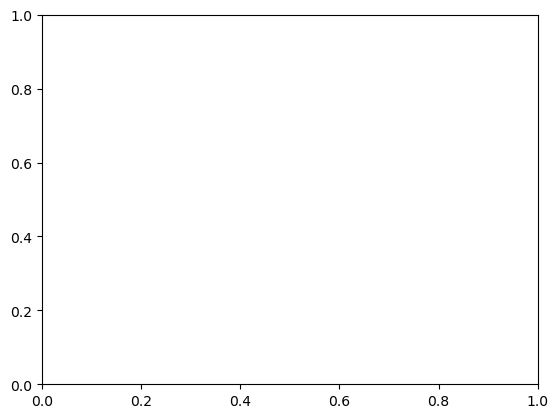

Iteration:71
ML: -1309.343; 	ML change (error):     0.000; 	Sigma^2:     0.062; 	Sigma^2 change:     0.000
[===================================================                     ]


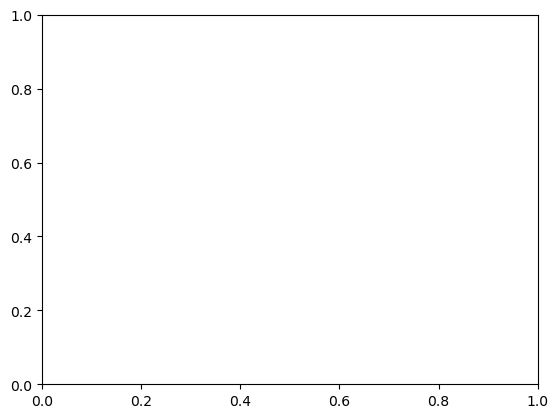

Iteration:72
ML: -1309.343; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[===================================================                     ]


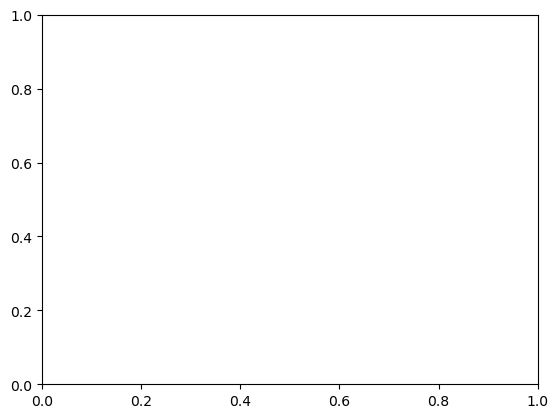

Iteration:73
ML: -1309.344; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[====================================================                    ]


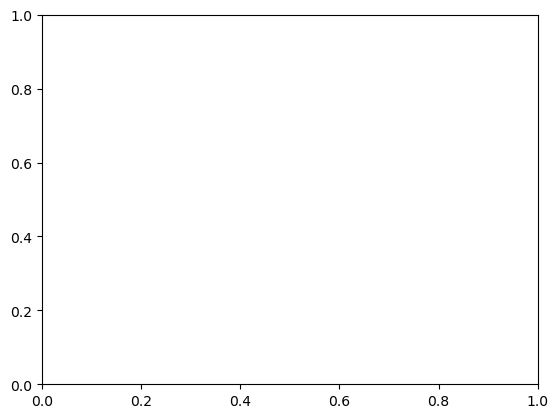

Iteration:74
ML: -1309.344; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[=====================================================                   ]


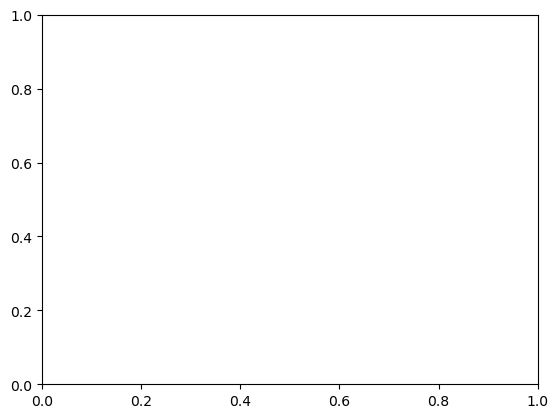

Iteration:75
ML: -1309.344; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[======================================================                  ]


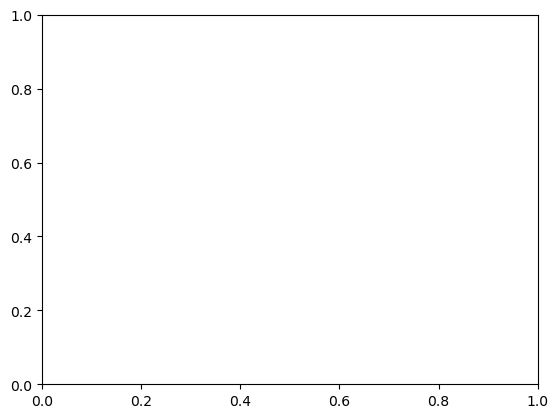

Iteration:76
ML: -1309.344; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[======================================================                  ]


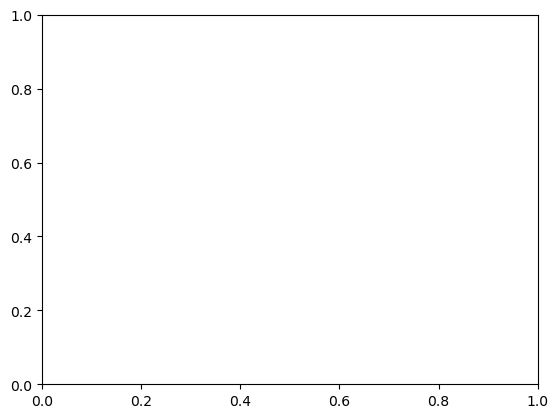

Iteration:77
ML: -1309.344; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[=======================================================                 ]


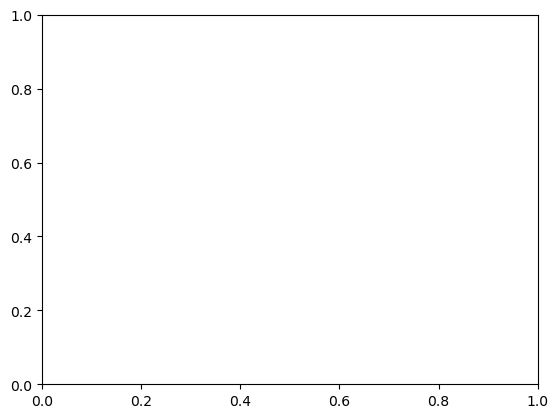

Iteration:78
ML: -1309.344; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[========================================================                ]


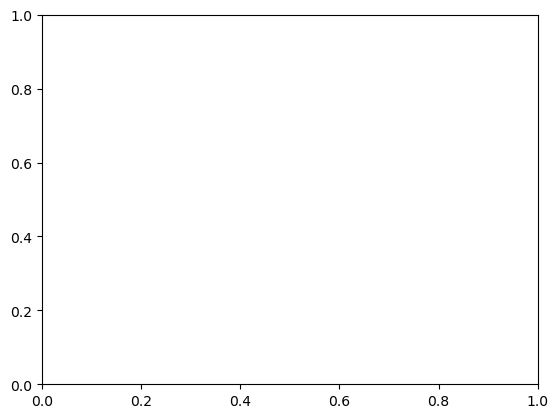

Iteration:79
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[========================================================                ]


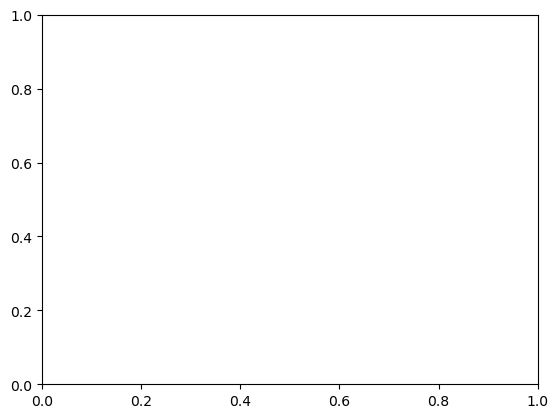

Iteration:80
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[=========================================================               ]


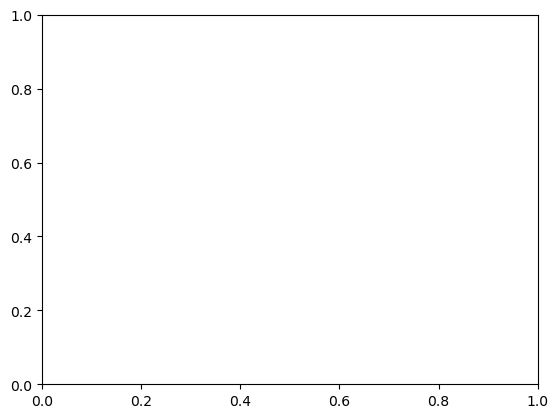

Iteration:81
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[==========================================================              ]


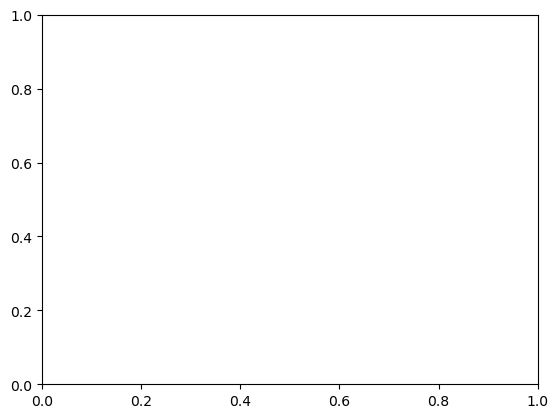

Iteration:82
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[===========================================================             ]


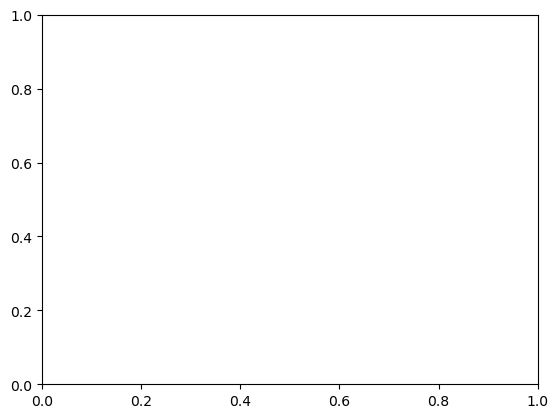

Iteration:83
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[===========================================================             ]


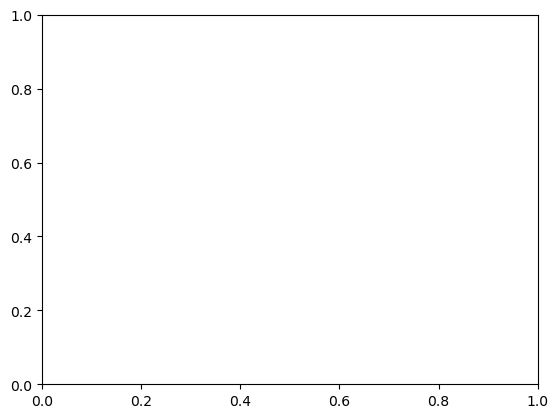

Iteration:84
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[============================================================            ]


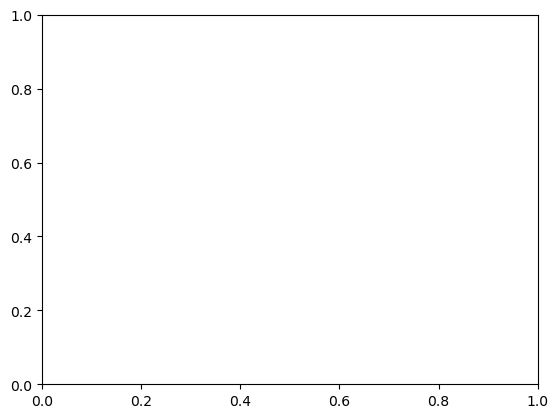

Iteration:85
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[=============================================================           ]


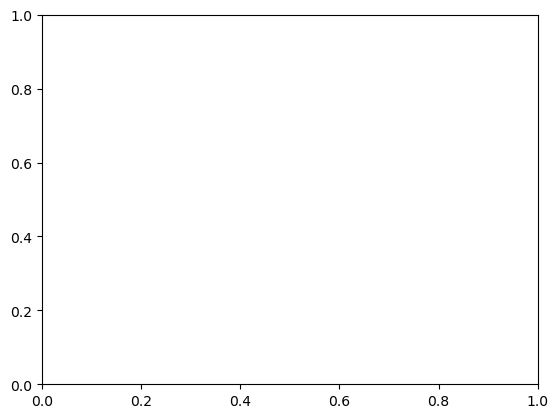

Iteration:86
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[=============================================================           ]


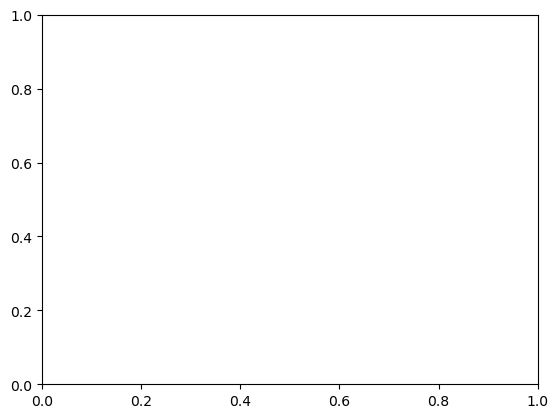

Iteration:87
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[==============================================================          ]


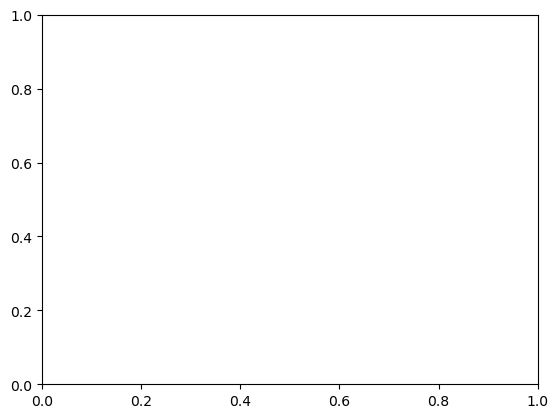

Iteration:88
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[===============================================================         ]


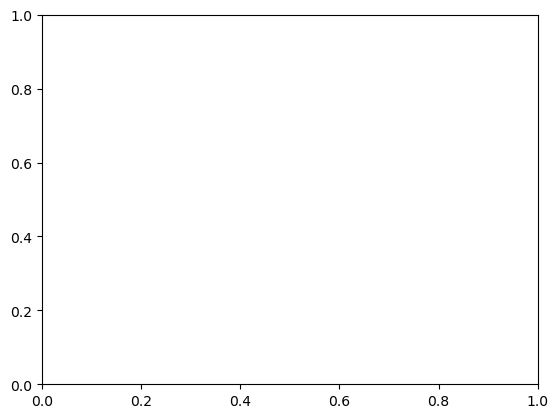

Iteration:89
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[================================================================        ]


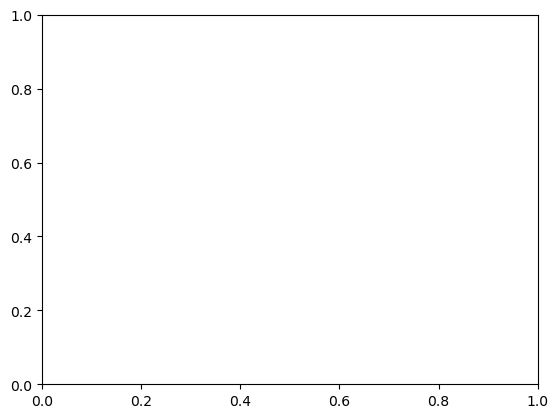

Iteration:90
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[================================================================        ]


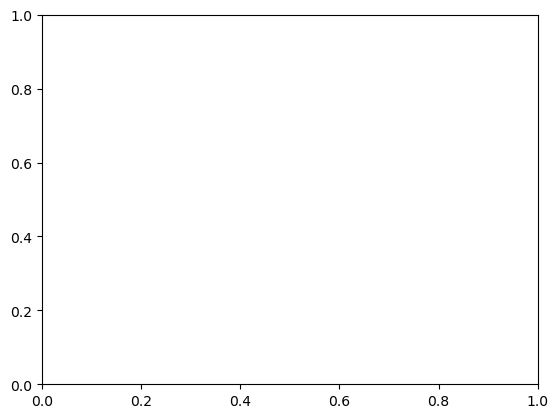

Iteration:91
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[=================================================================       ]


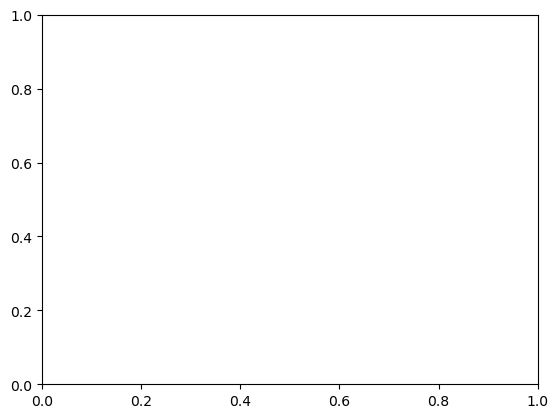

Iteration:92
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[==================================================================      ]


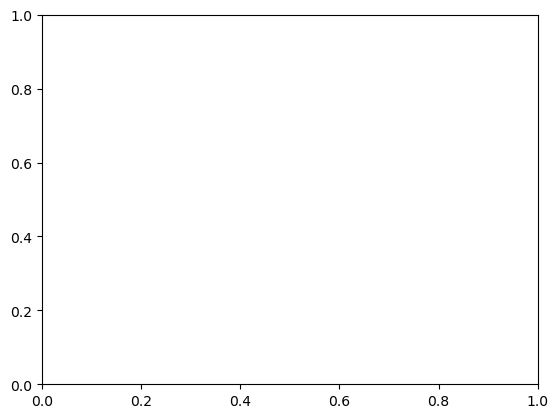

Iteration:93
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[==================================================================      ]


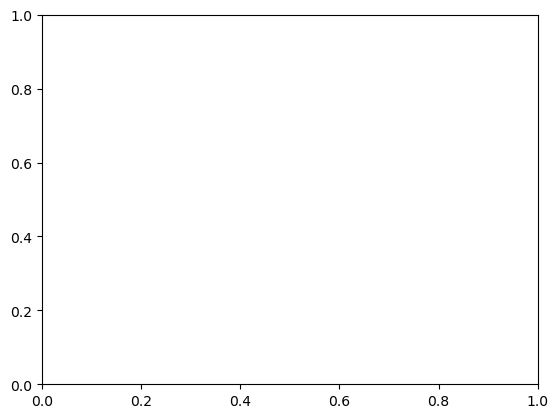

Iteration:94
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[===================================================================     ]


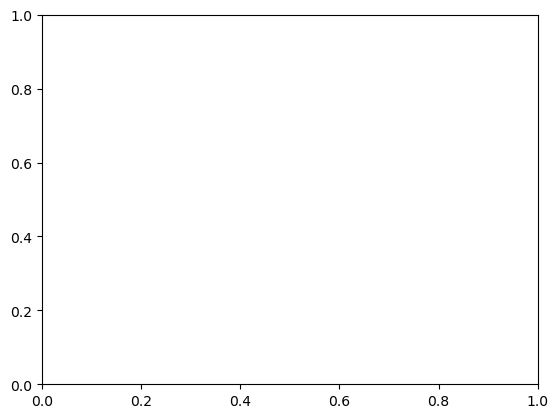

Iteration:95
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[====================================================================    ]


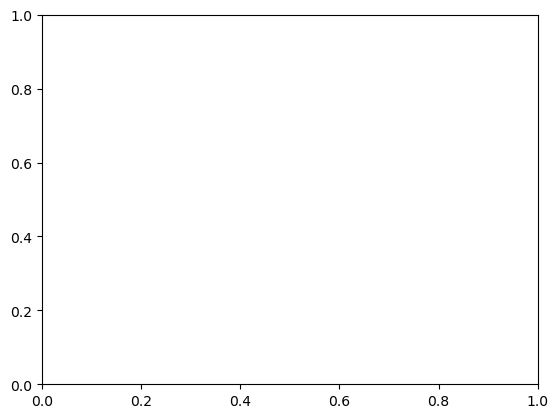

Iteration:96
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[=====================================================================   ]


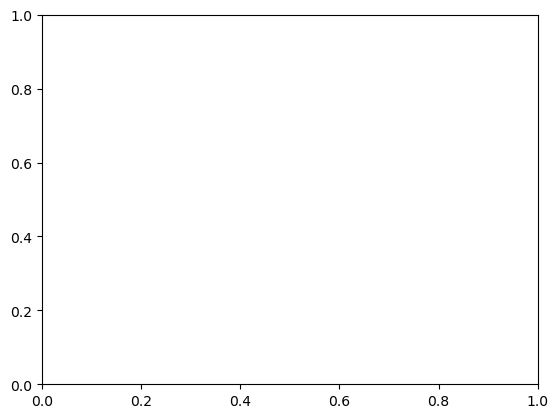

Iteration:97
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[=====================================================================   ]


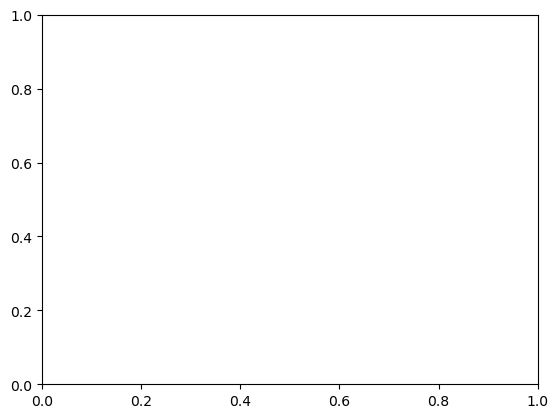

Iteration:98
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[======================================================================  ]


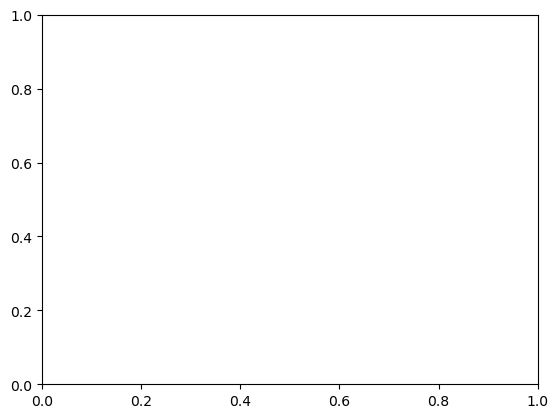

Iteration:99
ML: -1309.345; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[======================================================================= ]


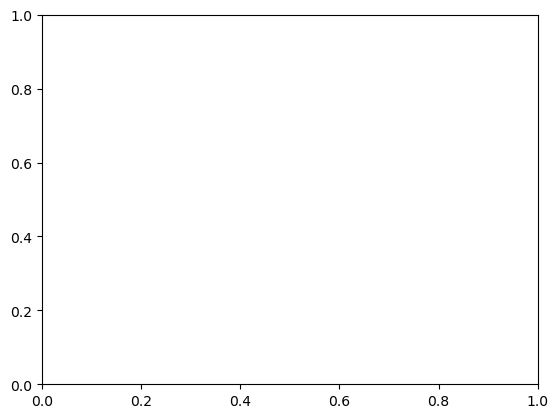

Iteration:100
ML: -1309.346; 	ML change (error):     0.000; 	Sigma^2:     0.061; 	Sigma^2 change:     0.000
[========================================================================]


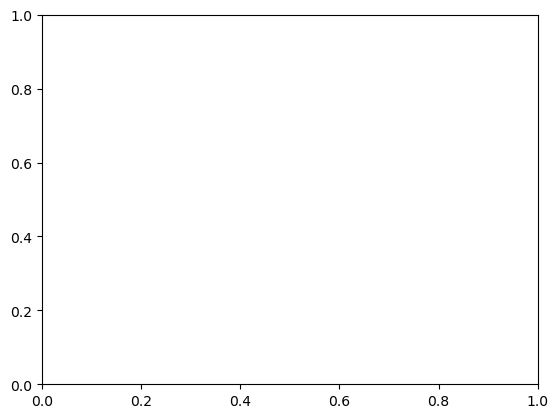

Registration Performance Metrics
Time to initialize EM: 0.00015807151794433594
Time to initialize registration: 2.3126602172851562e-05
Average Expectation Time:                    0.0005 +/- 0.0004
Average Maximization Time:                   0.0002 +/- 0.0001
Maximization Times - Per individual step
Average Update Transform Time:               0.0002 +/- 0.0001
Average Transform Time:                      0.0000 +/- 0.0000
Average Update Variance Time:                0.0000 +/- 0.0000

Number of iterations performed:          100
Error at time of finish:                 1.1522615523062996e-05


In [12]:
from functools import partial
from PIL import Image

import os

def visualize(iteration, error, X, Y, ax, fig, plt_prefix, save_fig=False):
    plt.cla()
    ax.cla()

    ax.scatter(X[:, 0], X[:, 1], color="blue", label="Target", alpha=0.5, s=3)
    ax.scatter(Y[:, 0], Y[:, 1], color="orange", label="Source", alpha=0.8, s=3)
    ax.legend(loc="upper left", fontsize="x-large")
    ax.text(
        0.87,
        0.92,
        "Iteration: {:d}\nError: {:06.4f}".format(iteration, error),
        horizontalalignment="center",
        verticalalignment="center",
        transform=ax.transAxes,
        fontsize="x-large",
    )
    plt.draw()
    if save_fig is True:
        fig.savefig("../plots/{}/spleen/{}_{:04}.tiff".format(plt_prefix, plt_prefix, iteration))  # Used for making gif.

    plt.pause(0.001)

fig, ax = plt.subplots(1,1)

visualize(
    iteration = 0,
    error = 0,
    X = ref_set_points,
    Y = new_dat_set_points,
    ax=ax, fig=fig, plt_prefix="rigid", save_fig=True
)

callback = partial(visualize, ax=ax, fig=fig, plt_prefix="rigid", save_fig=True)

reg = rigid_registration(**{'X': ref_set_points, 'Y': new_dat_set_points, 'scale': True})
# The above shows an example where we dont "test" or determine the scale.
# This makes it clear the CPD first actually shrinks the mesh and then "grows" it iteratively to make it
# best fit the data.
reg.register(callback)
# plt.show()

# List your TIFF filenames in the desired order
tiff_files = [f"../plots/rigid/spleen/{f}" for f in os.listdir("../plots/rigid/spleen") if f.lower().endswith(('.tif', '.tiff'))]
tiff_files.sort()
# Open images and convert to 'P' mode for GIF compatibility
frames = [Image.open(f).convert('P') for f in tiff_files]

# Save as GIF
frames[0].save(
    "../plots/rigid/output.gif",
    save_all=True,
    append_images=frames[1:],
    duration=300,   # duration per frame in ms
    loop=0          # 0 means loop forever
)

In [13]:
# set scale to False so we don't stretch or squezze the new data points
reg = rigid_registration(**{
    'X': ref_set_points, 
    'Y': new_dat_set_points, 
    'scale': True, 
    'verbose': True
})

TY, (s_reg, R_reg, t_reg) = reg.register()

Iteration:1
ML: -1143.741; 	ML change (error):  1143.741; 	Sigma^2:     0.475; 	Sigma^2 change:     0.664
[                                                                        ]
Iteration:2
ML: -1251.643; 	ML change (error):   107.902; 	Sigma^2:     0.421; 	Sigma^2 change:     0.055
[=                                                                       ]
Iteration:3
ML: -1256.925; 	ML change (error):     5.282; 	Sigma^2:     0.382; 	Sigma^2 change:     0.039
[==                                                                      ]
Iteration:4
ML: -1261.471; 	ML change (error):     4.547; 	Sigma^2:     0.342; 	Sigma^2 change:     0.040
[==                                                                      ]
Iteration:5
ML: -1266.688; 	ML change (error):     5.217; 	Sigma^2:     0.303; 	Sigma^2 change:     0.039
[===                                                                     ]
Iteration:6
ML: -1272.366; 	ML change (error):     5.678; 	Sigma^2:     0.266; 	Sigma^2 change:

In [11]:
# final parameters to transform Y to X.
print(f"s: {s_reg}, r: {R_reg}, t: {t_reg}")

s: 1.0068929267645574, r: [[ 0.99999692 -0.00248314]
 [ 0.00248314  0.99999692]], t: [-0.24374154  0.24010033]


In [18]:
# degree of rotation?
np.arctan2(R_reg[1,0], R_reg[1,1]) * 180 / np.pi

np.float64(0.14227350924508902)

<Axes: xlabel='CD69#BB700', ylabel='CD19#PE-Cy5'>

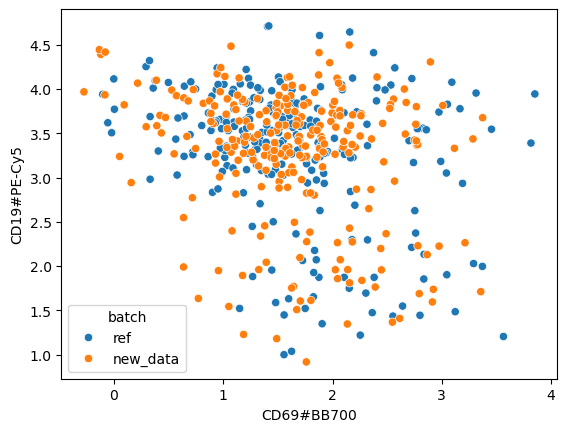

In [22]:
ref_set_points_df = pd.DataFrame(ref_set_points, columns=markers)
ref_set_points_df.loc[:, "bin_id"] = ref_set_points_bin_ids
# based on each bin get the label with most points and give that bin that label
ref_bin_labels = df_ref_with_bins.groupby('bin_id')['Population'].agg(lambda x: x.value_counts().idxmax())

ref_set_points_df['Population'] = ref_set_points_df['bin_id'].map(ref_bin_labels)
ref_set_points_df['batch'] = 'ref'

new_dat_set_points_df = pd.DataFrame(TY, columns=markers)
new_dat_set_points_df.loc[:, "bin_id"] = new_dat_set_points_bin_ids
new_dat_set_points_df['batch'] = 'new_data'

all_df = pd.concat([ref_set_points_df, new_dat_set_points_df])

sns.scatterplot(
    data = all_df,
    x = markers[0],
    y = markers[1],
    hue='batch',
)



Wow, it moved the top population just a bit further up..
Bottom one is left untouched.

# Label new data

In [24]:
new_labels = label_new_data(
    ref_set_points_df=ref_set_points_df,
    new_dat_set_points_df=new_dat_set_points_df,
    ppm_dat_bin_coords=ppm_new_dat_bin_coords,
    df_new_with_bins=df_new_with_bins,
    markers=markers
)

Text(0.5, 1.0, 'True label')

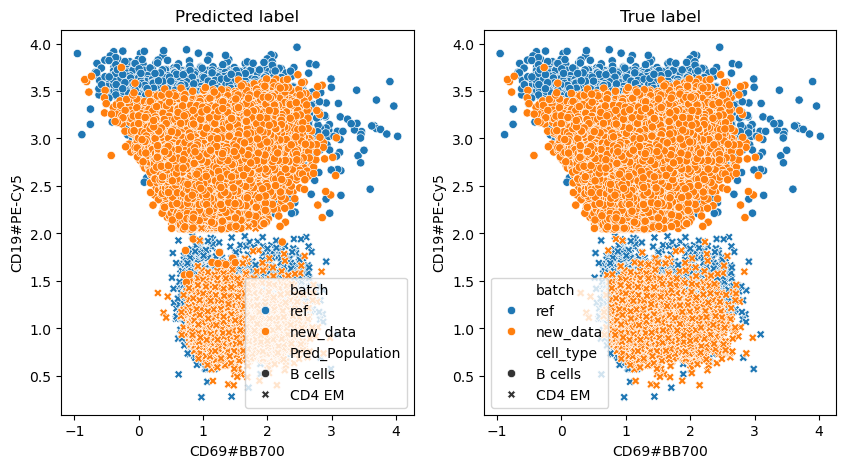

In [25]:
df_new_with_bins['Pred_Population'] = new_labels
df_ref_with_bins['Pred_Population'] = df_ref_with_bins['Population']
all_df = pd.concat([df_ref_with_bins, df_new_with_bins])

_, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 5))

sns.scatterplot(
    data = all_df,
    x = markers[0],
    y = markers[1],
    hue='batch',
    style = 'Pred_Population',
    ax=axs[0]
).set_title("Predicted label")

sns.scatterplot(
    data = df,
    x = markers[0],
    y = markers[1],
    hue='batch',
    style = 'cell_type',
    ax=axs[1]
).set_title("True label")

# Some classification metrics

In [26]:
# some metrics?
y_true = df_new_with_bins['cell_type'].to_numpy()
y_pred = df_new_with_bins['Pred_Population'].to_numpy()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, pos_label='B cells')
recall = recall_score(y_true, y_pred, pos_label='B cells')
f1 = f1_score(y_true, y_pred, pos_label='B cells')

print(f'Accuracy:  {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall:    {recall:.4f}')
print(f'F1 Score:  {f1:.4f}')


Accuracy:  0.9996
Precision: 1.0000
Recall:    0.9996
F1 Score:  0.9998


Pretty good actually. 
Need to try it on the other dataset though.